<div style=" ">
    <div style="position:absolute; bottom:68px; left:25px;">
        <h2 style="margin:5px 5px 5px 15px;padding-left:10px">Hochshule Anhalt</h2>
    </div>
    <div style="float:left;">
        <img src="img/hsLogo.JPG" alt="" style="width:300px;">
    </div>   
    <div style="float:left; padding-left: 20px;background-color:#e7e9eb">
        <h1 style="font-family: new times roman">Projekt Data Science 1</h1>
        <h6 style="font-family: new times roman; margin-left:20px;">Student: Amer Goli</h6>
    </div>
    <div style=" display:block;margin-left: 20px;">
    </div>
</div>

<div style="background-color:#e7e9eb;">
    </br>
    </br>
    
   <h1 style="text-align:center;font-family: new times roman; font-size:2.8em">Clustering I</h1>
   

   </br>  </br> </br>  </br> </br>  </br> 
</div>





## Clustering
- Normierung
- Clustering
        K-means
        Agglomerative Clustering



##

#### Bibliotheken

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn.preprocessing import MinMaxScaler



#### Funktionen

In [2]:
karte = gpd.read_file('geo/newfile.shp') #Die Karte einlesen

def aggClu(data, clusters):
    return AgglomerativeClustering(n_clusters = clusters, linkage='ward').fit(data)#, affinity='manhattan', linkage='single'

def clusterInfo(kmeansLabel):#plot: eine Grafik mit den Clustern und Anzahl deren Elemnten.
    unique, counts = np.unique(kmeansLabel, return_counts=True)

    bins = np.linspace(0, len(counts)-1)
    plt.figure(figsize=(10,5))
    plt.titel = 'sdfsdf'
    plt.hist(kmeansLabel, bins,rwidth=0.99)
    plt.xlabel('Clusters')
    plt.ylabel('Frequency')
    plt.title('Cluster Frequenz')
   # plt.show()

# kann 2 karten mit unterschiedlichen Infos kriegen. Kann der letzten Parameter ignoriert werden
def showMap(karte, titel,clusterData1, clusterData2 = None):
    if clusterData2 is not None:
        kmeansLabels2 = pd.Series(clusterData2)
        AuslTeil2 = pd.concat([karte, kmeansLabels2], axis=1)
        AuslTeil2['kmeans'] = kmeansLabels2
        AuslTeilGeo2 = GeoDataFrame(AuslTeil2, geometry='geometry')

    kmeansLabels = pd.Series(clusterData1)
    AuslTeil = pd.concat([karte, kmeansLabels], axis=1)
    AuslTeil['kmeans'] = kmeansLabels

    AuslTeilGeo = GeoDataFrame(AuslTeil, geometry='geometry')
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
    AuslTeilGeo.plot(ax=ax1,column='kmeans', legend=True, cmap='YlGnBu')
    if clusterData2 is not None:
        AuslTeilGeo2.plot(ax=ax2,column='kmeans', legend=True, cmap='YlGnBu')#figsize=(10,10),column='kmeans', legend=True, cmap='YlGnBu')
       # ax2.title.set_text('hh', size=8)
        ax2.set_title(titel[1], size=10) # Title
        
    fig.set_figheight(12)
    fig.set_figwidth(20)
    ax1.set_title(titel[0], size=10)
    ax2.axis('off')
    ax1.axis('off')
    plt.show()
    
def ellenbogen_M(data, clustersNum):# Funktion für Ermittlung von inertia. Damit wird die Anzahl der Clustern beim K-means geschätzt.
    Js = []
    assignment = []
    for k in range(2,clustersNum):    
        kmeans = KMeans(n_clusters=k,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(data)
        Js.append(kmeans.inertia_)
        assignment.append(kmeans.labels_)

    plt.figure(figsize=(10.1,5))
    plt.plot(range(2,clustersNum),Js)
    plt.text(-2., 0.35,'',  fontsize=8)
    plt.xlabel('Anzahl Clusters')
    plt.ylabel('Gesamtvariation')
    plt.title('ellenbogen Methode für Kmeans')
    
    plt.show()

#### CSV-Datei einlesen

In [4]:
Data = pd.read_csv("02_DataConsoldTocluster_.csv", encoding='latin-1',  skip_blank_lines=True, skipinitialspace=True, sep=';', index_col=0)
cols = Data.columns
display(Data.head())

,id,Landkreis,Einwohner_pro_qkm,Bevölkerung,anteil_bevölkerung_0_bis_44,arbeitslosenqoute,pkw_bestand_je_tsd_einwohner,bip_je_erwerbstätigen,krankenhausbetten_je_tsd_einwohner
0,1001,"Flensburg, Stadt",1701,90164,0.541,0.080,489.6,62665.0,9.8
1,1002,"Kiel, Landeshauptstadt",2080,246794,0.557,0.076,445.0,67116.0,10.1
2,1003,"Lübeck, Hansestadt",1011,216530,0.485,0.073,453.4,68377.0,9.1
3,1004,"Neumünster, Stadt",1119,80196,0.490,0.079,527.8,62247.0,8.7
4,1051,Dithmarschen,93,133193,0.441,0.055,605.7,72256.0,4.9


## Daten normieren
Die unterschiedlichen Normierungsmethoden lassen unterschiedliche Clusterings hervorrufen. MinMaxScalar sorgt dafür, dass die Verteilung der Daten in Clustern etwas ausgewogener ist. 

In [5]:
scaler = MinMaxScaler()
Data[Data.columns[2:]] = scaler.fit_transform(Data[Data.columns[2:]])
Data

,id,Landkreis,Einwohner_pro_qkm,Bevölkerung,anteil_bevölkerung_0_bis_44,arbeitslosenqoute,pkw_bestand_je_tsd_einwohner,bip_je_erwerbstätigen,krankenhausbetten_je_tsd_einwohner
0,1001,"Flensburg, Stadt",0.351192,0.015397,0.719008,0.582609,0.202262,0.096923,0.328767
1,1002,"Kiel, Landeshauptstadt",0.431133,0.058482,0.785124,0.547826,0.144950,0.136750,0.339041
2,1003,"Lübeck, Hansestadt",0.205653,0.050157,0.487603,0.521739,0.155744,0.148033,0.304795
3,1004,"Neumünster, Stadt",0.228433,0.012655,0.508264,0.573913,0.251349,0.093183,0.291096
4,1051,Dithmarschen,0.012023,0.027233,0.305785,0.365217,0.351452,0.182741,0.160959
...,...,...,...,...,...,...,...,...,...
396,16073,Saalfeld-Rudolstadt,0.013921,0.018982,0.074380,0.347826,0.300565,0.073632,0.308219
397,16074,Saale-Holzland-Kreis,0.013921,0.013412,0.198347,0.243478,0.336289,0.033062,0.260274
398,16075,Saale-Orla-Kreis,0.007171,0.012686,0.144628,0.286957,0.372526,0.065847,0.044521
399,16076,Greiz,0.016663,0.017386,0.020661,0.286957,0.363660,0.062295,0.133562


## Clustering
   Da wir hier mit numerische Daten zu tun haben, ist es sinnvoll, mit Clustringalgorithmen zu arbeiten, die distanzbasiert sind. K-means wäre hier die erste Wahl. Darüber hinaus kann zum Vergleich einen Hirarischischen Clusteringalgorithmus mit Daten probiert werden. Die Auswahl hier ist Agglomerative Clustering. Beide Algorithmen sind flexible und sehr leicht zu verwenden.

#### 1. K-means
   
   K-means gehört zu einfachsten Algorithmen fürs Clustering, welcher auch distanzbasiert (hier euklidische Dist.) ist. Einige Entwicklerinnen und Entwickler tendieren dazu, bei kleinen Datensätzen K-means zu verwenden, weil er gut mit kleinen Datensätzen umgehe. 
   
<img src="img/K means.gif" alt="" style="width:700px;">

###### Quelle: https://buggyprogrammer.com/difference-between-k-means-and-knn/

   
#### 2. AgglomerativeClustering
   
   AgglomerativeClustering ist einer hirarschicher Algorithmus mit verschiedene Ähnlichkeitsmaßen. wir werden hier euklidische Distanz nehmen.
   <img src="img/hierarch.gif" alt="" style="width:700px;">
###### Quelle:https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
   
   
   
#### Anzahl der Clustern für K-means bestimmen

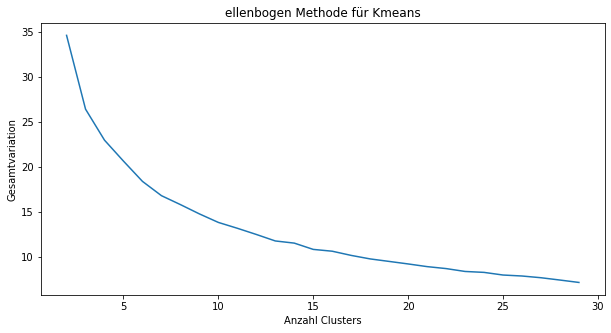

In [6]:
ellenbogen_M(Data[Data.columns[2:]], 30)

Oben dargestellte Grafik zeigt, dass wir die Anzahl der Clustern in einem Intervall zwischen 5 und 10 wählen können. Um zu vermeiden, zu große Clustern bilden zu lassen, werden 8 Clustern gebildet.


#### Anzahl der Clustern für Agg. bestimmen
. scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)

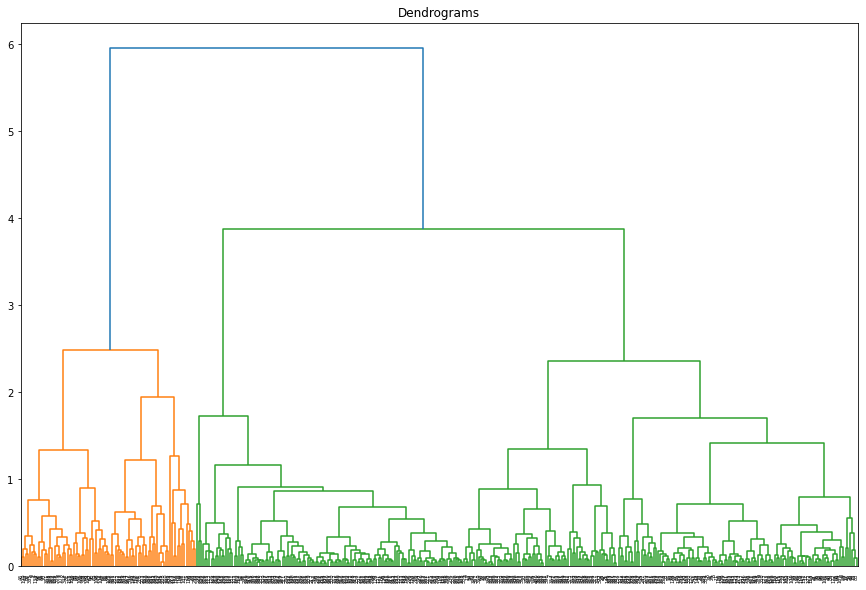

In [14]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(15, 10))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Data[Data.columns[2:]], method='ward'))

Dabei ist zu sehen, das Dataset in 2 Großen Clusters aufgeteilt werden können. Allerdings ist hier auch zu sehen, wie beim K-means, dass man größere Clusteranzahl auch aussuchen kann.Der Agg. Clustering wird vorerst als Vergleich zum K-means genommen. Daher wird die Anzahl der Clustern als 8 fetgelegt. 

Die Level 6 wurde für die Schnittpunkt ausgesucht. Damit werden 8 kleinere Clusters entstehen. Dabei sind die Clusters nicht stark auseinander.

<img src="img/dendogramExpl.jpg" alt="" style="width:900px;">

Es ist zu erwähnen, dass West- und Oststruktur in Clustering zu sehen ist. Der Grund dafür ist die Struktur der Einzelne Attribute, wie es in Data_Exploration auch zu sehen ist.

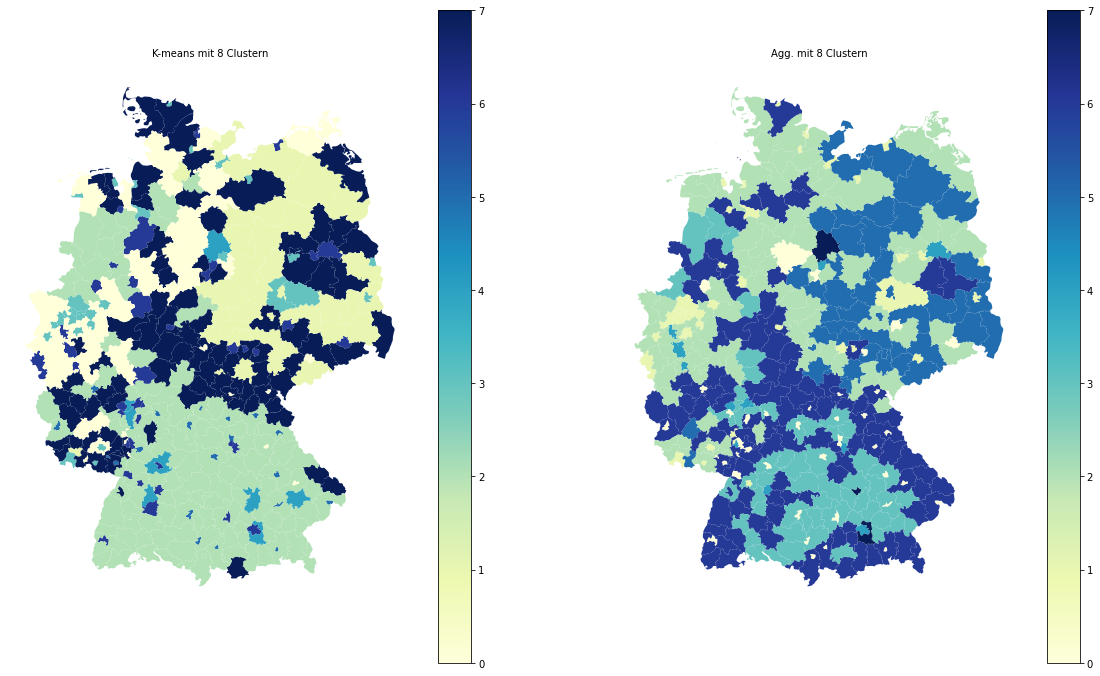

In [7]:
karte = gpd.read_file('geo/newfile.shp')

kmeans = KMeans(n_clusters=8,init='k-means++', max_iter= 128, random_state=1,n_init=20).fit(Data[Data.columns[3:]])
Agg = aggClu(Data[Data.columns[2:]], 8)
showMap(karte, ['K-means mit 8 Clustern','Agg. mit 8 Clustern'],kmeans.labels_, Agg.labels_)


#### Datenverteilung in Clusters bei K-Means

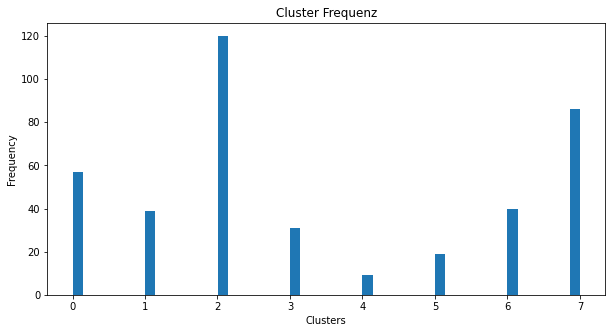

In [8]:
clusterInfo(kmeans.labels_)

#### Datenverteilung in Clusters bei Agg.


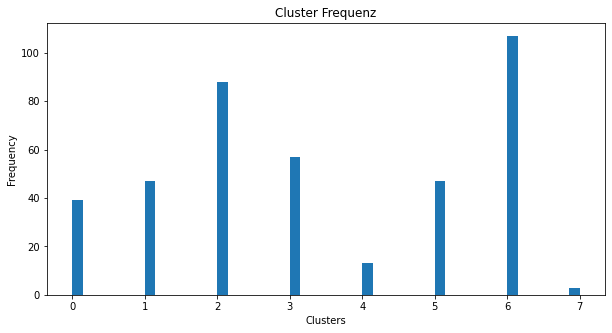

In [9]:
clusterInfo(Agg.labels_)

#### Export der CSV_Dateien

In [10]:
Aggl = Data[Data.columns[:2]].copy()
Aggl['Cluster'] = Agg.labels_
Aggl.to_csv('03_AggTeil1_8C.csv', sep=';', encoding='latin-1', index=True)

km = Data[Data.columns[:2]].copy()
km['Cluster'] = kmeans.labels_
km.to_csv('03_kmeansTeil1_8C.csv', sep=';', encoding='latin-1', index=True)

In [11]:
kmeansTeil1 = pd.read_csv("03_kmeansTeil1_8C.csv", encoding='latin-1',  skip_blank_lines=True, skipinitialspace=True, sep=';', index_col=0)
#kmeansTeil1


#### Inhalt von Clusters
Hier werden die kleinsten Clusters etwas analysiert. Denn die Städte Münschen, Ingolstadt und Wolfsburg bei K-means liegen in Cluster 4 mit 6 Anderen. Diese Städte liegen bei Agg. im Cluster 6 und zwar zu dritt.
1. K-Means

In [12]:
kmeansTeil1[kmeansTeil1['Cluster'] == 4]

,id,Landkreis,Cluster
18,3103,"Wolfsburg, Stadt",4
122,6433,Groß-Gerau,4
125,6436,Main-Taunus-Kreis,4
179,8115,Böblingen,4
185,8125,Heilbronn,4
222,9161,Ingolstadt,4
238,9184,München,4
240,9186,Pfaffenhofen a.d.Ilm,4
256,9279,Dingolfing-Landau,4


In [14]:
AggTeil1 = pd.read_csv("03_AggTeil1_8C.csv", encoding='latin-1',  skip_blank_lines=True, skipinitialspace=True, sep=';', index_col=0)
#AggTeil1

   
   2. Agglomerativ Clustering

In [15]:
AggTeil1[AggTeil1['Cluster'] == 7].head(10)


,id,Landkreis,Cluster
18,3103,"Wolfsburg, Stadt",7
222,9161,Ingolstadt,7
238,9184,München,7


Beide Algorithmen liefern hinsichtlich der Ähnlichkeit der Werten gute Ergebnisse. Allerdings scheint so zu sein, dass Agg. mit einem 3-elementigen Cluster etwas späzifisch geclustert zu haben. Wenn wir die Cluster 7 von Agg. und 4 von K-means vergleichen, finden wir heraus, dass der Agg. gegenüber 'bip_je_erwerbstätigen' etwas sensibler gewesen ist als K-means.

In [16]:
display(Data[(Data['Landkreis'] == 'München') | (Data['Landkreis'] == 'Ingolstadt') | (Data['Landkreis'] == 'Wolfsburg, Stadt')] )


,id,Landkreis,Einwohner_pro_qkm,Bevölkerung,anteil_bevölkerung_0_bis_44,arbeitslosenqoute,pkw_bestand_je_tsd_einwohner,bip_je_erwerbstätigen,krankenhausbetten_je_tsd_einwohner
18,3103,"Wolfsburg, Stadt",0.120650,0.024806,0.570248,0.278261,1.000000,1.000000,0.143836
222,9161,Ingolstadt,0.209660,0.028388,0.764463,0.139130,0.492033,0.751143,0.321918
238,9184,München,0.103776,0.087002,0.595041,0.078261,0.477512,0.729221,0.126712


In [17]:
display(Data[(Data['Landkreis'] == 'München') | (Data['Landkreis'] == 'Ingolstadt') | (Data['Landkreis'] == 'Wolfsburg, Stadt')|(Data['Landkreis'] == 'Groß-Gerau') | (Data['Landkreis'] == 'Main-Taunus-Kreis') | (Data['Landkreis'] == 'Böblingen')  | (Data['Landkreis'] == 'Heilbronn') | (Data['Landkreis'] == 'Pfaffenhofen a.d.Ilm')|(Data['Landkreis'] == 'Dingolfing-Landau')] )


,id,Landkreis,Einwohner_pro_qkm,Bevölkerung,anteil_bevölkerung_0_bis_44,arbeitslosenqoute,pkw_bestand_je_tsd_einwohner,bip_je_erwerbstätigen,krankenhausbetten_je_tsd_einwohner
18,3103,"Wolfsburg, Stadt",0.120650,0.024806,0.570248,0.278261,1.000000,1.000000,0.143836
122,6433,Groß-Gerau,0.120861,0.066441,0.632231,0.295652,0.387176,0.410813,0.123288
125,6436,Main-Taunus-Kreis,0.218519,0.056217,0.504132,0.173913,0.593035,0.441638,0.092466
179,8115,Böblingen,0.126556,0.098648,0.603306,0.130435,0.403238,0.514053,0.089041
185,8125,Heilbronn,0.058426,0.085347,0.570248,0.130435,0.477512,0.392344,0.116438
222,9161,Ingolstadt,0.209660,0.028388,0.764463,0.139130,0.492033,0.751143,0.321918
238,9184,München,0.103776,0.087002,0.595041,0.078261,0.477512,0.729221,0.126712
240,9186,Pfaffenhofen a.d.Ilm,0.027842,0.025867,0.623967,0.026087,0.403238,0.444877,0.082192
256,9279,Dingolfing-Landau,0.015609,0.017190,0.553719,0.139130,0.472758,0.436001,0.037671
